# 1. Weather

### Librerias

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

### EDA

In [2]:
data = pd.read_csv('weather.csv', sep=',', header=0)
data.shape

(35, 13)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,station
0,-3.9,-4.5,-2.3,1.2,5.4,10.9,15.5,15.3,11.6,6.9,3.4,-1.5,St. John’s
1,-7.1,-7.5,-3.1,2.3,8.5,14.5,18.3,17.8,13.5,8.1,2.9,-3.9,Charlottetown
2,-6.0,-6.1,-1.6,3.3,9.2,14.8,18.2,18.1,13.8,8.6,3.4,-2.9,Halifax
3,-4.7,-5.9,-2.5,2.0,7.4,13.2,17.7,17.6,13.5,8.4,3.8,-1.8,Sydney
4,-2.7,-3.2,0.3,4.7,9.2,13.4,16.3,16.4,13.6,9.5,5.2,-0.3,Yarmouth


In [4]:
data.isna().sum()

0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
station    0
dtype: int64

In [8]:
data.dtypes

0          float64
1          float64
2          float64
3          float64
4          float64
5          float64
6          float64
7          float64
8          float64
9          float64
10         float64
11         float64
station     object
dtype: object

In [9]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,35.000000,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,-14.171429,-11.842857,-6.942857,0.90000,7.974286,13.431429,16.442857,15.354286,10.454286,4.368571,-3.400000,-10.625714
std,9.654672,9.236255,8.636015,7.08258,5.245578,4.050474,3.590042,3.702491,4.355074,5.702464,7.734339,8.962023
min,-32.100000,-33.200000,-31.400000,-23.10000,-10.900000,-0.600000,4.100000,2.400000,-5.100000,-15.100000,-24.500000,-29.300000
25%,-21.100000,-16.350000,-9.850000,0.40000,7.500000,12.900000,15.300000,14.100000,9.600000,3.650000,-7.350000,-16.550000
50%,-12.100000,-10.800000,-4.500000,3.20000,9.300000,14.100000,17.300000,16.100000,11.600000,6.100000,-2.600000,-9.000000
75%,-6.650000,-6.100000,-2.050000,4.50000,10.950000,15.900000,18.650000,17.800000,13.550000,8.250000,3.000000,-3.500000
max,4.100000,5.800000,6.700000,9.10000,14.100000,18.300000,20.900000,19.800000,15.500000,10.800000,7.200000,5.300000


<Figure size 800x800 with 0 Axes>

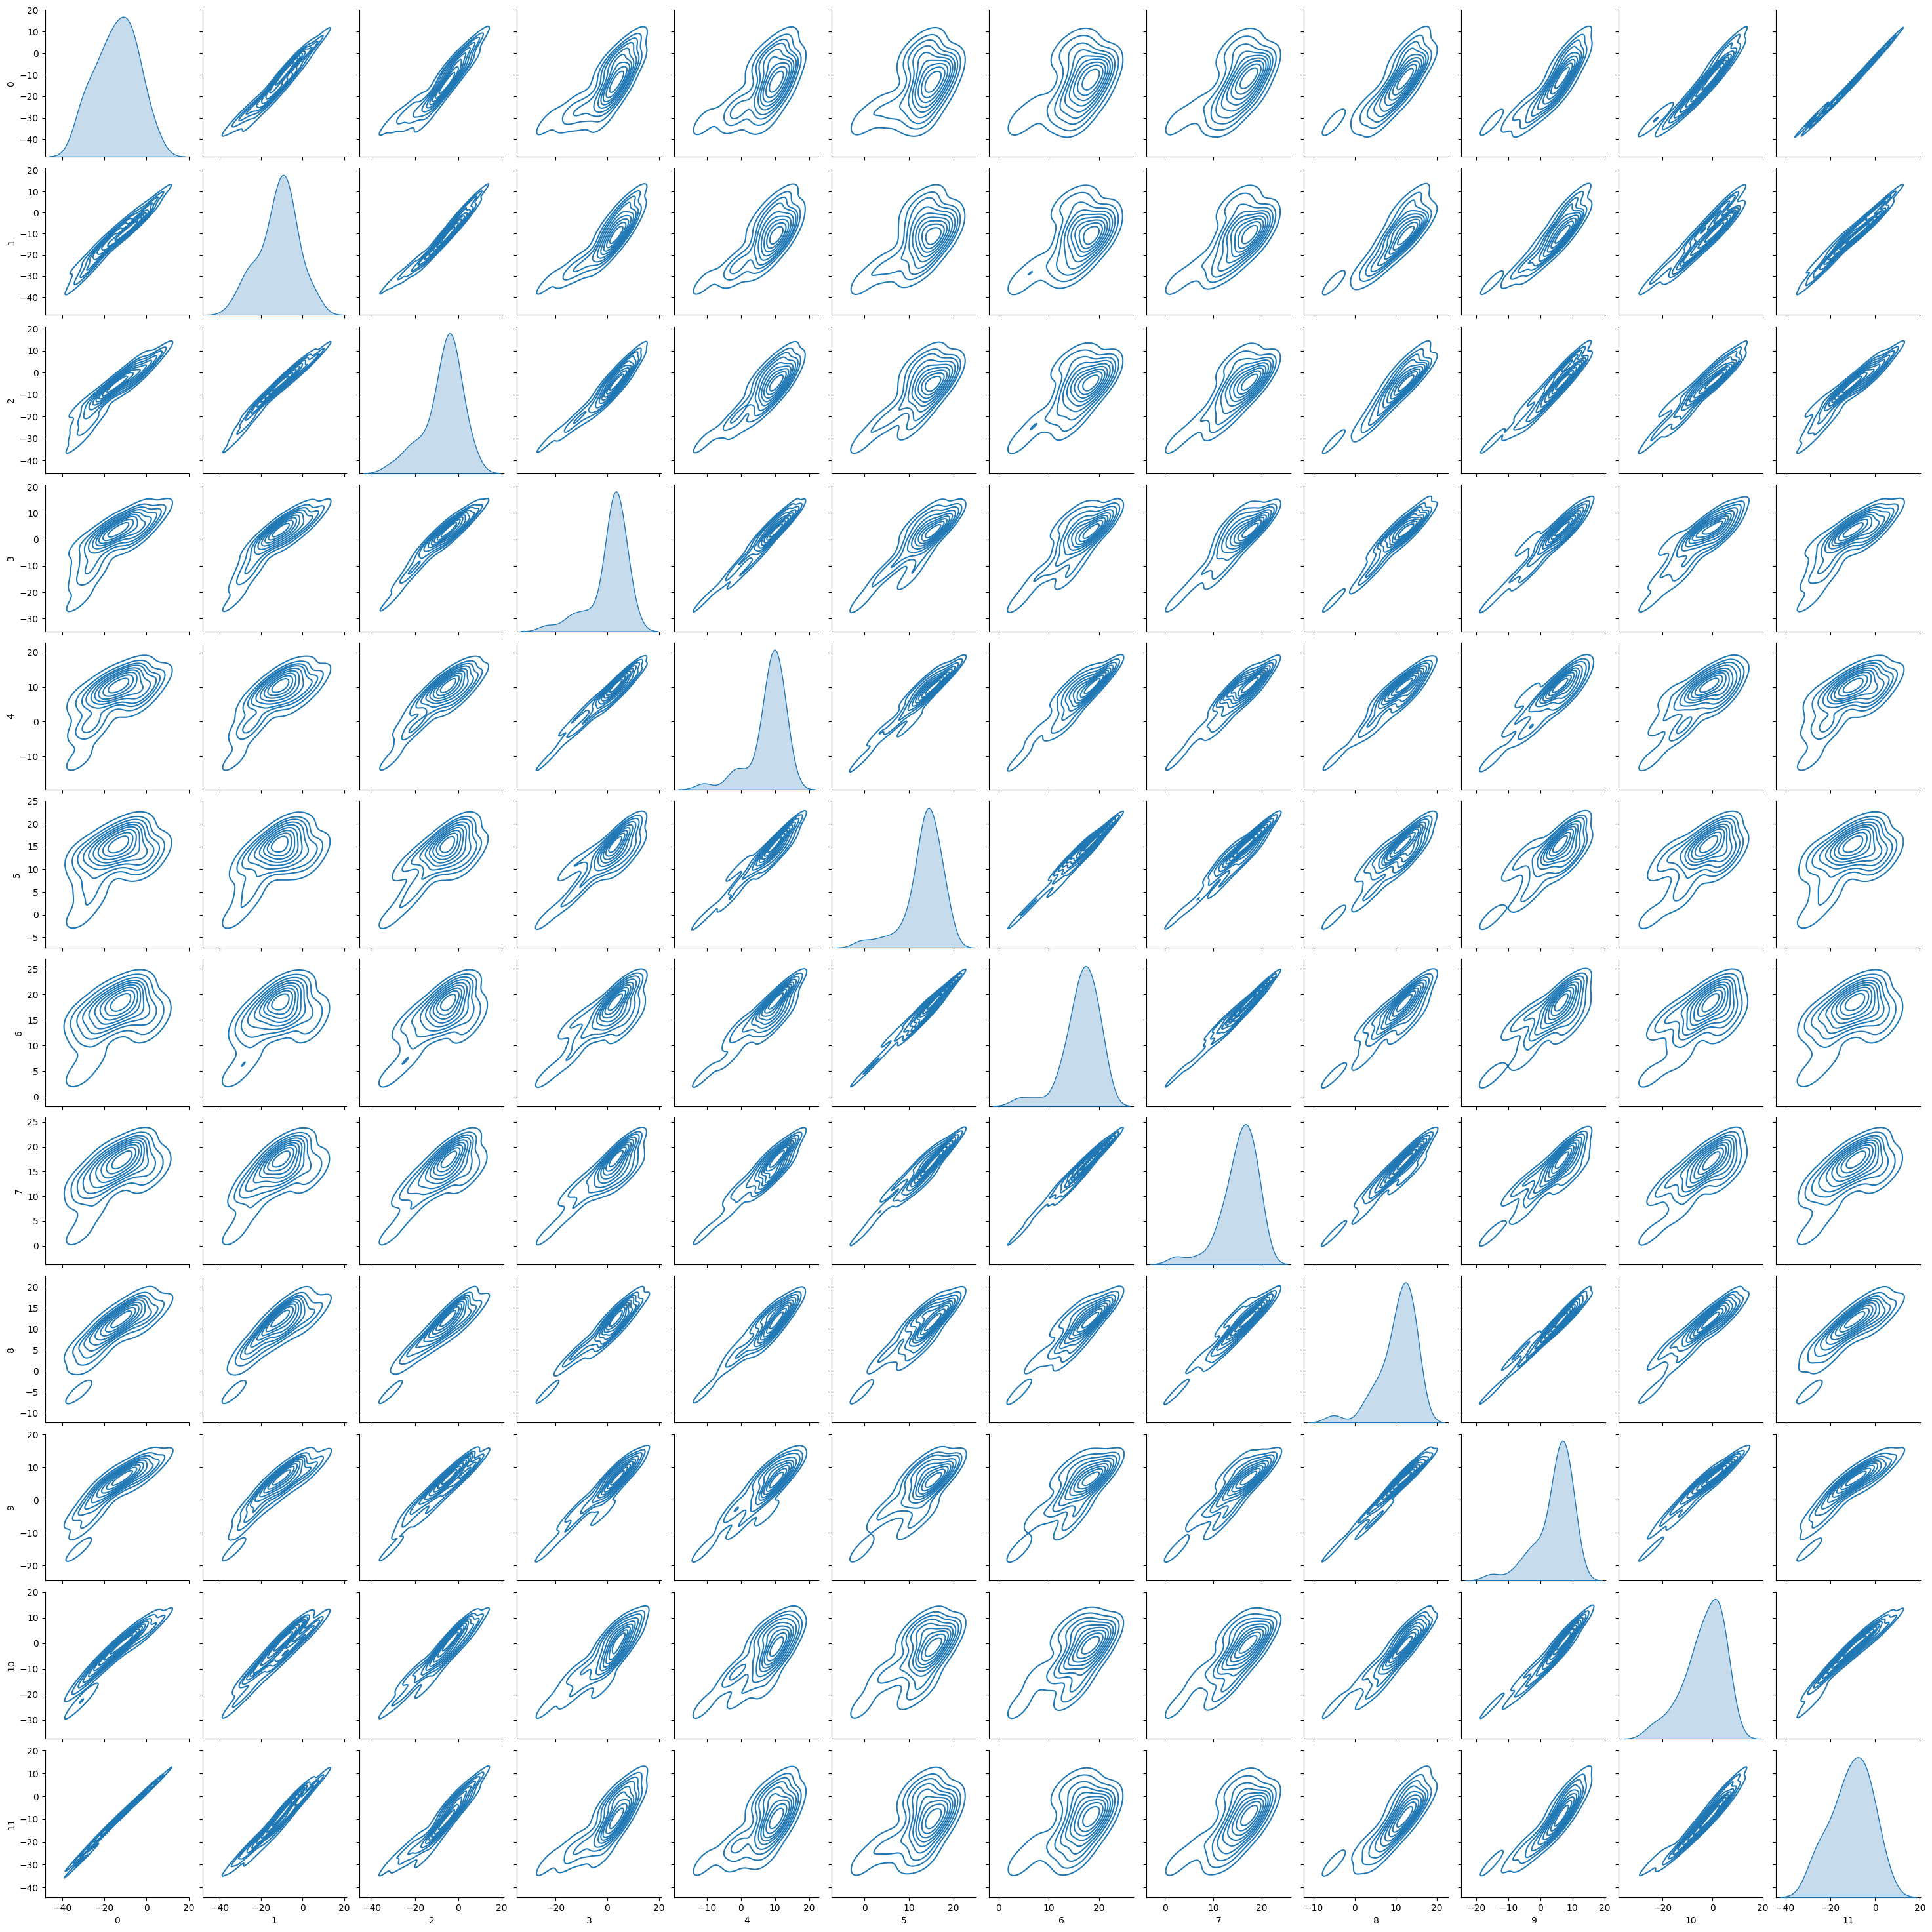

In [11]:
# Pairplot 

plt.figure(figsize=(8,8))
sns.pairplot(data, diag_kind='kde', kind='kde')
plt.show()

<Figure size 640x480 with 0 Axes>

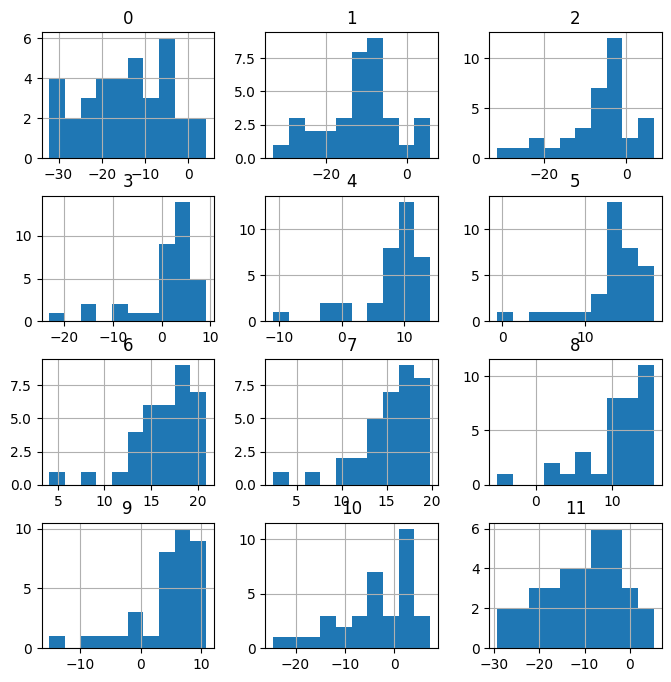

In [12]:
# Histogramas

plt.figure()
data.hist(figsize=(8,8))
plt.show()

### PCA

In [13]:
# Convertimos los datos en un array

names = data.values[:,-1]

X = data.values[:,:12].astype(np.float32) 
X.shape

(35, 12)

In [18]:
# Encontramos el vector de medias 

vec_medias = np.mean(X, axis=0)
print(vec_medias)

[-14.171429   -11.842857    -6.9428573    0.89999986   7.974286
  13.431428    16.442856    15.354286    10.454287     4.368571
  -3.3999999  -10.625715  ]


In [19]:
# Encontramos el vector de desv. estandar

vec_desv = np.std(X, axis=0)
print(vec_desv)

[9.515748  9.103353  8.511749  6.9806676 5.170098  3.9921901 3.538384
 3.6492147 4.2924085 5.62041   7.623048  8.833067 ]


In [24]:
# Centrado y estandarizado de datos 

mu = X.mean(axis=0)
std = X.std(axis=0)
Xc = (X - mu) / std

## media datos estandarizados 
vec_medias_est = np.mean(Xc, axis=0)
print(vec_medias_est)
## desviacion estandar datos estandarizados
vec_desv_est = np.std(Xc, axis=0)
print(vec_desv_est)

[ 3.4059799e-08  1.3623919e-08  3.0653819e-08  3.7465778e-08
 -6.3010624e-08  1.4901161e-07  3.4517475e-07 -1.3368471e-07
 -1.9924981e-07  9.8773413e-08 -4.7683717e-08  1.0558537e-07]
[1.0000001  1.         0.99999994 0.9999999  1.         1.
 1.         0.99999994 0.9999999  1.         1.         0.9999999 ]


In [27]:
# Matriz de covarianza 
Cov = (Xc.T) @ Xc    
print(np.round(Cov, 2))

[[35.   33.92 32.58 27.64 22.6  17.57 16.86 21.68 28.4  30.53 33.36 34.86]
 [33.92 35.   34.24 30.8  26.15 20.32 18.58 22.91 29.16 31.3  32.65 34.17]
 [32.58 34.24 35.   33.35 29.91 25.07 23.46 27.03 31.87 33.18 33.24 33.24]
 [27.64 30.8  33.35 35.   33.78 30.2  28.34 30.49 32.94 33.06 30.54 28.9 ]
 [22.6  26.15 29.91 33.78 35.   33.4  31.57 32.23 32.31 30.97 26.82 24.04]
 [17.57 20.32 25.07 30.2  33.4  35.   34.23 33.42 30.85 27.7  22.8  18.96]
 [16.86 18.58 23.46 28.34 31.57 34.23 35.   34.32 30.89 27.48 22.78 18.37]
 [21.68 22.91 27.03 30.49 32.23 33.42 34.32 35.   33.27 30.84 27.05 23.16]
 [28.4  29.16 31.87 32.94 32.31 30.85 30.89 33.27 35.   34.19 32.22 29.54]
 [30.53 31.3  33.18 33.06 30.97 27.7  27.48 30.84 34.19 35.   33.82 31.65]
 [33.36 32.65 33.24 30.54 26.82 22.8  22.78 27.05 32.22 33.82 35.   33.92]
 [34.86 34.17 33.24 28.9  24.04 18.96 18.37 23.16 29.54 31.65 33.92 35.  ]]


In [29]:
# Descomposicion SVD

U, S, V = np.linalg.svd(Xc)
print(np.round(U, 2))

[[-0.06  0.26  0.21 ...  0.17  0.13  0.31]
 [-0.1   0.05  0.25 ... -0.3  -0.41 -0.04]
 [-0.12  0.06  0.21 ...  0.2   0.37 -0.07]
 ...
 [ 0.32 -0.15  0.11 ...  0.25 -0.09 -0.18]
 [ 0.56  0.28  0.03 ... -0.06  0.17  0.08]
 [ 0.18 -0.24  0.06 ... -0.2   0.1   0.75]]


In [32]:
print(U.shape)
print(V.shape)

(35, 35)
(12, 12)


In [46]:
X2 = Xc @ (V[:2,:].T)    
X2.shape

(35, 2)

In [39]:
pcamodel = PCA(n_components=12)
pca2 = pcamodel.fit_transform(Xc)
pca2.shape

(35, 12)

In [40]:
ll = pcamodel.explained_variance_
ll / ll.sum()

array([8.4836614e-01, 1.2431065e-01, 1.8560074e-02, 5.5538048e-03,
       1.4425801e-03, 8.3058293e-04, 4.1819620e-04, 2.6511020e-04,
       1.1158777e-04, 6.9865826e-05, 3.8877432e-05, 3.2534699e-05],
      dtype=float32)

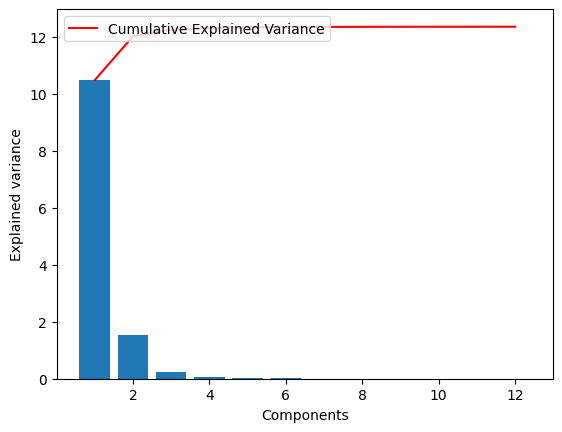

In [41]:
plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pcamodel.explained_variance_ )+1),
         np.cumsum(pcamodel.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')
plt.show()

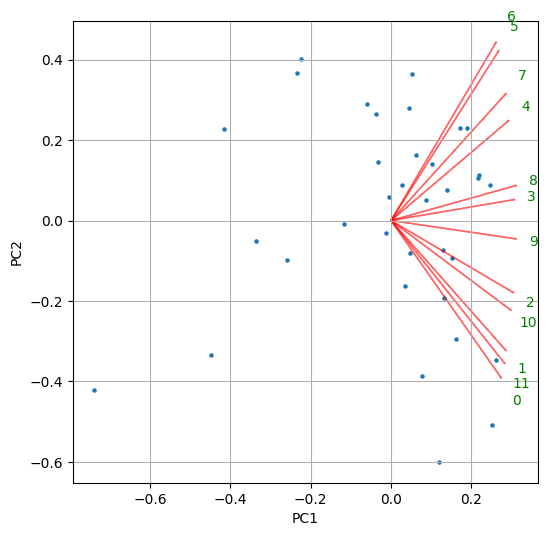

In [50]:
def mybiplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

plt.figure(figsize=(6,6))
mybiplot(pca2[:,0:2], np.transpose(pcamodel.components_[0:2, :]), list(data.columns[:-1]))
plt.show()

# 2. Crimes

### Librerias

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### EDA

In [53]:
data2 = pd.read_csv("crimes.dat", sep=",", skipinitialspace=True)
data2.shape

(7, 9)

In [55]:
data2.head()

,Crime,No.,1,2,3,4,5,6,7
0,Murder,1,1.00,0.52,0.34,0.81,0.28,0.06,0.11
1,Rape,2,0.52,1.00,0.55,0.70,0.68,0.60,0.44
2,Robbery,3,0.34,0.55,1.00,0.56,0.62,0.44,0.62
3,Assault,4,0.81,0.70,0.56,1.00,0.52,0.32,0.33
4,Burglary,5,0.28,0.68,0.62,0.52,1.00,0.80,0.70


In [56]:
data2.isna().sum()

Crime    0
No.      0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
dtype: int64

In [57]:
data2.dtypes

Crime     object
No.        int64
1        float64
2        float64
3        float64
4        float64
5        float64
6        float64
7        float64
dtype: object

In [59]:
data2.describe()

,No.,1,2,3,4,5,6,7
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,4.000000,0.445714,0.641429,0.590000,0.605714,0.657143,0.538571,0.535714
std,2.160247,0.352508,0.182065,0.207123,0.249390,0.224627,0.308676,0.283599
min,1.000000,0.060000,0.440000,0.340000,0.320000,0.280000,0.060000,0.110000
25%,2.500000,0.195000,0.535000,0.495000,0.425000,0.570000,0.380000,0.385000
50%,4.000000,0.340000,0.600000,0.560000,0.560000,0.680000,0.550000,0.550000
75%,5.500000,0.665000,0.690000,0.620000,0.755000,0.750000,0.700000,0.660000
max,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Matriz de correlación

### Escalamiento multidimensional

# 3.Imagen

# 4. Filtro colaborativo